# Start

## Testato con immagine library/python:latest

In [1]:
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Loading data and test files as requested
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [4]:
# Splitting dependent and independent features
X_train = train_data.iloc[:,1:].values
y_train = train_data.iloc[:,:1].values.ravel()

X_test = test_data.iloc[:,1:].values
y_test = test_data.iloc[:,:1].values.ravel()

Training/test accuracy with C=60: 0.894 0.767


([<matplotlib.axis.XTick at 0x7fe51e8083a0>,
 [Text(0, 0, 'age'),
  Text(1, 0, 'anaemia'),
  Text(2, 0, 'creatinine_phosphokinase'),
  Text(3, 0, 'diabetes'),
  Text(4, 0, 'ejection_fraction'),
  Text(5, 0, 'high_blood_pressure'),
  Text(6, 0, 'platelets'),
  Text(7, 0, 'serum_creatinine'),
  Text(8, 0, 'serum_sodium'),
  Text(9, 0, 'sex'),
  Text(10, 0, 'smoking'),
  Text(11, 0, 'time')])

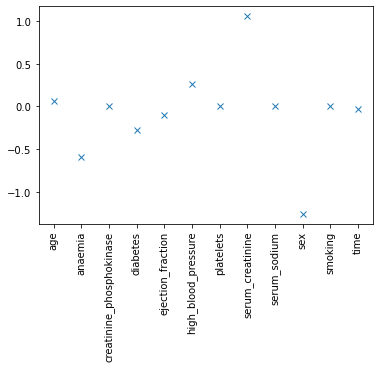

In [5]:
# Time for some regression! First we train the model, then we test it.
# With C=x we get the best results.

# Since DecisionTreeClassifier will give too much weight to the time feature, we choose LogisticRegression 
# to create a good linear boundary

from sklearn.linear_model import LogisticRegression

C=60

lr_l1 = LogisticRegression(C=C,solver='liblinear', penalty="l1").fit(X_train, y_train)
train_score = lr_l1.score(X_train, y_train)
test_score = lr_l1.score(X_test, y_test)
print("Training/test accuracy with C={:.0f}: {:.3f} {:.3f}".format(C, train_score, test_score))


# We plot the coefficient of each feature of the decision function
plt.plot(lr_l1.coef_.T, 'x', label="C={:.3f}".format(C))
plt.xticks(range(12), train_data.columns[1:], rotation=90)

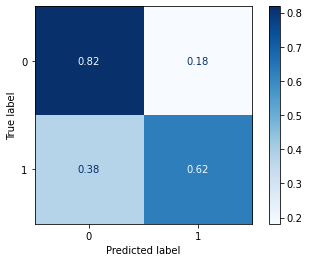

In [6]:
# We plot the confusion matrix to better explain the prediction behavior on the test set
# and be sure that the model predicts both classes

plot_confusion_matrix(lr_l1, X_test, y_test, cmap=plt.cm.Blues, normalize='true')

## END